# Analyzing Different Regression and Classification Algorithms on Breast Cancer Data 

#### The breast cancer dataset is a relatively well known dataset that provides nearly 600 samples of breast measurements of breast cancer patients and if they are malignant(spread) or benign(dormant). In this project, the machine learning concepts learned in class such as data preparation, clustering, regression and classification will be used to ultimately perform several regression and classification algorithms to develope a model to predict malignant or benign tumors. Note that for easy of readability, many of the step descriptions are written in-line with the code as comments.
[Step 1: Selecting and Loading the Dataset](#Step1)\
\
[Step 2: Introduction to the Dataset and Dataset Analysis](#Step2)\
\
[Step 3: Using Vizualization to Understand the Breast Cancer Data](#Step3)\
\
[Step 4: Applying Clustering Algorithms (K means/ Hierarchical clustering) To Improve Understanding](#Step4)\
\
[Step 5: Applying Recursive Feature Elimination to Select Features](#Step5)\
\
[Step 6: Applying PCA to reduce dimensions of the dataset](#Step6)\
\
[Step 7.1: Applying All Regression Algorithms to the Original and Dimension-Reduced Dataset with Evaluation Metrics](#Step7.1)\
\
[Step 7.2: Applying All Classification Algorithms to the Original and Dimension-Reduced Dataset with Evaluation Metrics](#Step7.2)\




<a id='Step1'></a>
# Step 1: Selecting and Loading the Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# The data variable now holds the dataset and its attributes.

<a id='Step2'></a>
# Step 2: Introduction to the Dataset and Dataset Analysis

In [9]:
import pandas as pd

# Create a DataFrame to display the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target "label" column to the DataFrame
df['target'] = data.target

# Print the first few rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

##### The dataset "breast_cancer" fits the criteria to perform classification and regression algorithms as the dataset contains high quility data that has been cleaned already. Furthermore, there are no missing values and the target variables are binary 1's or 0's. The data shown aboveshows that the data is clearly constructed with distinguised columns and rows. The first 5 samples of data where the columns represent the breast attributes and the last column representing if the sample is. malignant or benign(target variable). The dataset contains a total of 569 total samples with 212 samples for malignant and 357 samples for benign so there should be a sufficient amount of data to produce relatively accurate regression and classification.

<a id='Step3'></a>
# Step 3: Using Vizualization to Understand the Breast Cancer Data



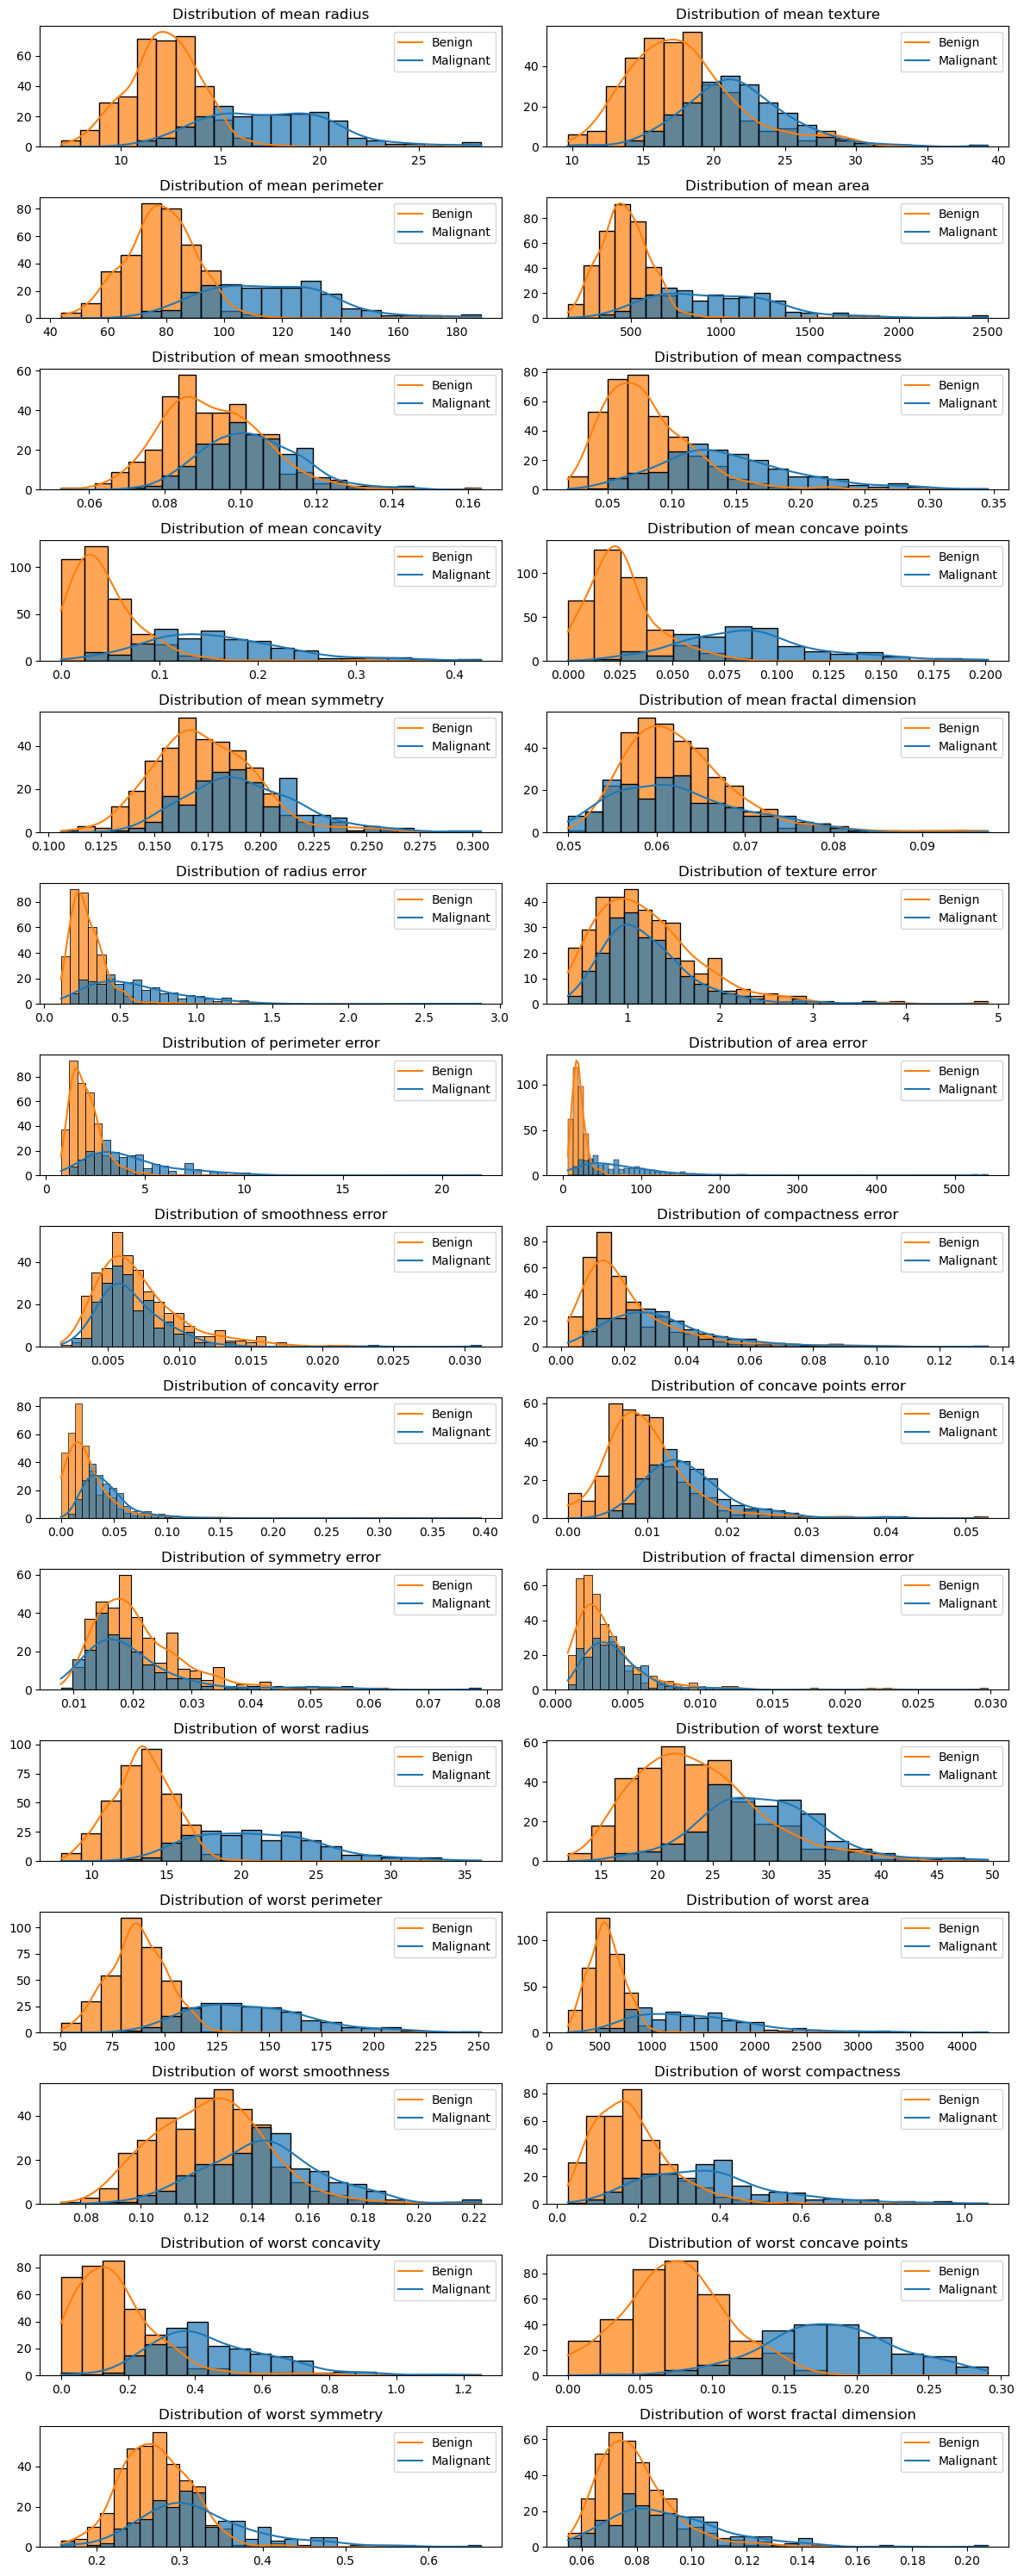

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Class labels are correct (0 is benign, 1 is malignant)

# Create histograms to visualize feature distributions for both classes
fig, axes = plt.subplots(15, 2, figsize=(12, 30))
axes = axes.ravel()

# Comparing the distribution of each feature for both classes
for i, feature in enumerate(data.feature_names):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], hue='target', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(['Benign', 'Malignant'])

plt.tight_layout()
plt.show()


#### As seen from these graphs, malignant almost always seems to follow the positive trend of the feature (As a feature value increases, the likelyhood of a tuor to be malignant increases)

<a id='Step4'></a>
# Step 4: Applying Clustering Algorithms (K means/ Hierarchical clustering) To Improve Understanding

C:\Users\black\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\black\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


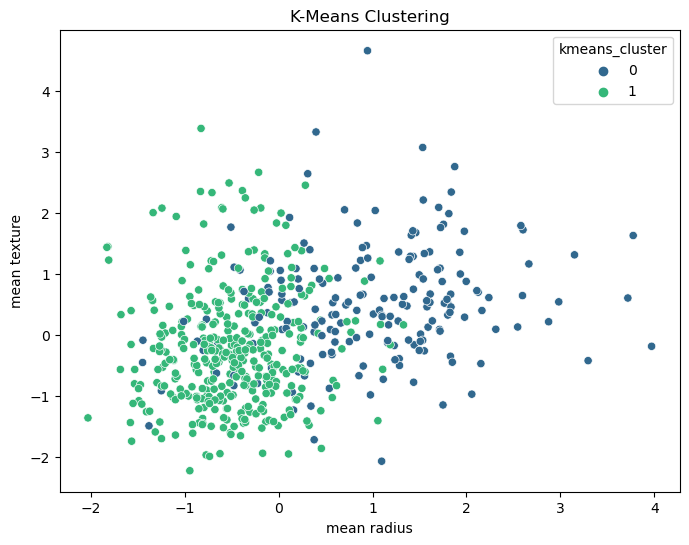

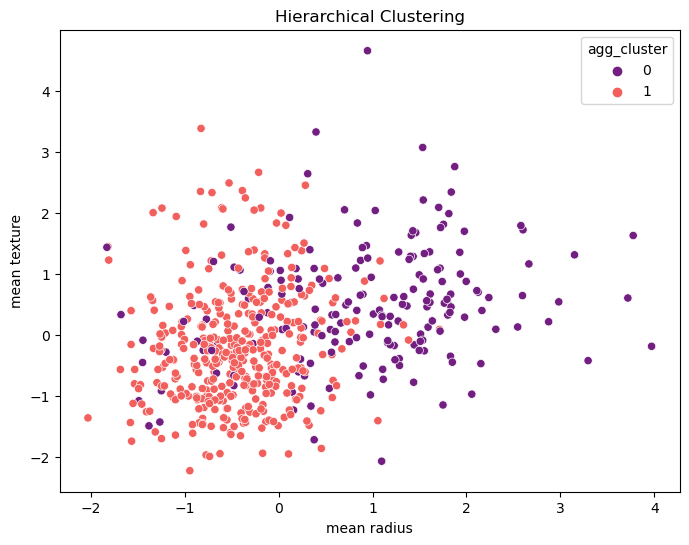

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Create a new DataFrame with the cluster labels
df_kmeans = pd.DataFrame(data=X_scaled, columns=df.columns[:-1])
df_kmeans['target'] = y
df_kmeans['kmeans_cluster'] = kmeans_labels

# Apply Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Create a new DataFrame with the cluster labels
df_agg = pd.DataFrame(data=X_scaled, columns=df.columns[:-1])
df_agg['target'] = y
df_agg['agg_cluster'] = agg_labels

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='kmeans_cluster', data=df_kmeans, palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.show()

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='agg_cluster', data=df_agg, palette='magma', legend='full')
plt.title('Hierarchical Clustering')
plt.show()

# Separate the original dataset from the clustered datasets
df_kmeans_original = df_kmeans.drop(['kmeans_cluster'], axis=1)
df_agg_original = df_agg.drop(['agg_cluster'], axis=1)



<a id='Step5'></a>
# Step 5: Applying Recursive Feature Elimination to Select Features

Selected Features:
Index(['mean radius', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'texture error',
       'perimeter error', 'worst radius', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'],
      dtype='object')


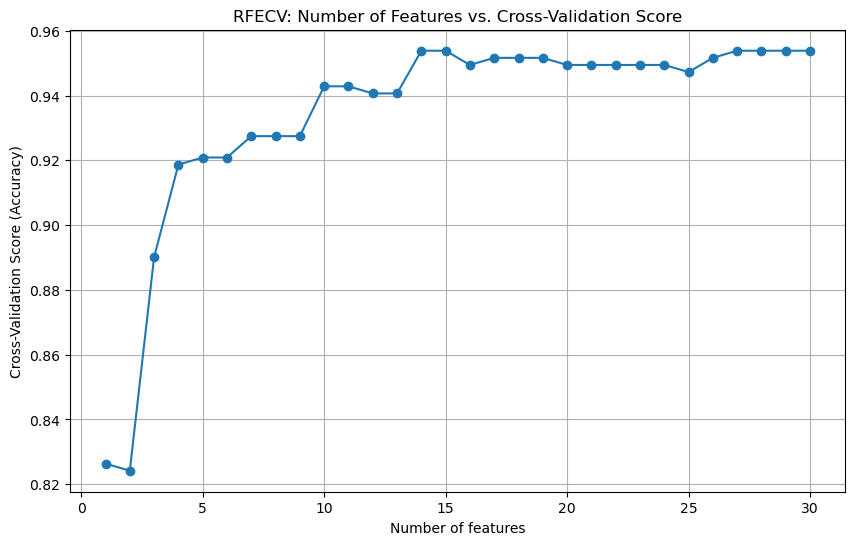

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model, increase max iteration size
base_estimator = LogisticRegression(max_iter=3000, random_state=42)

# Perform RFECV with Logistic Regression
rfecv = RFECV(estimator=base_estimator, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

# Plot the number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of features")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.title("RFECV: Number of Features vs. Cross-Validation Score")
plt.grid()
plt.show()


<a id='Step6'></a>
# Step 6: Applying PCA to Reduce Dimensions of the Dataset

Original Data Dimensions: 30 features
Reduced Data Dimensions: 10 principal components


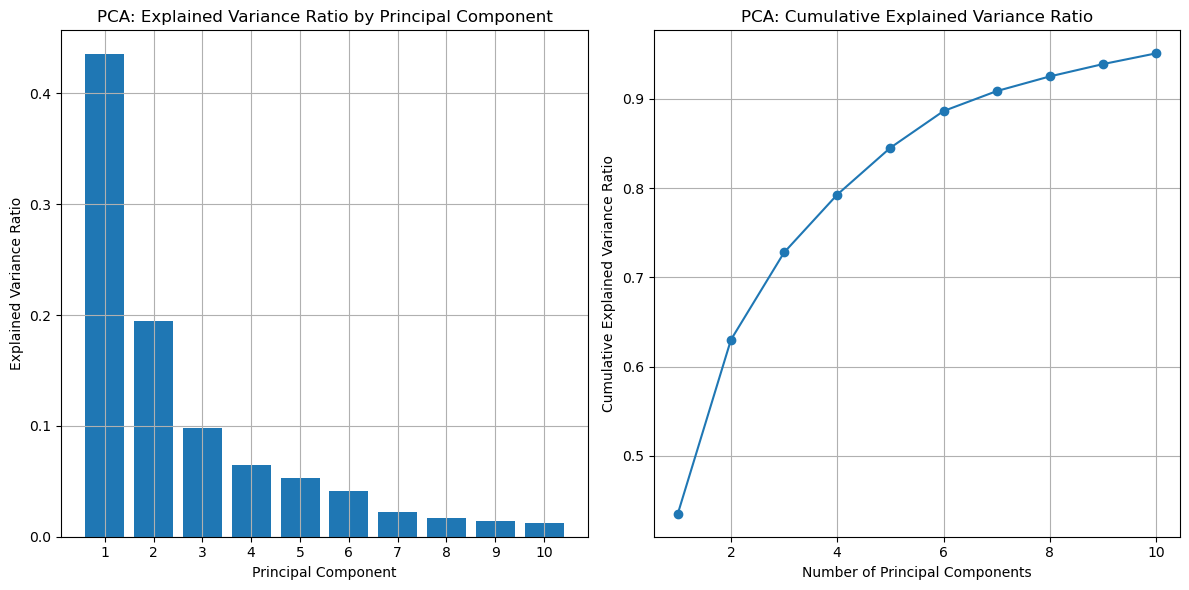

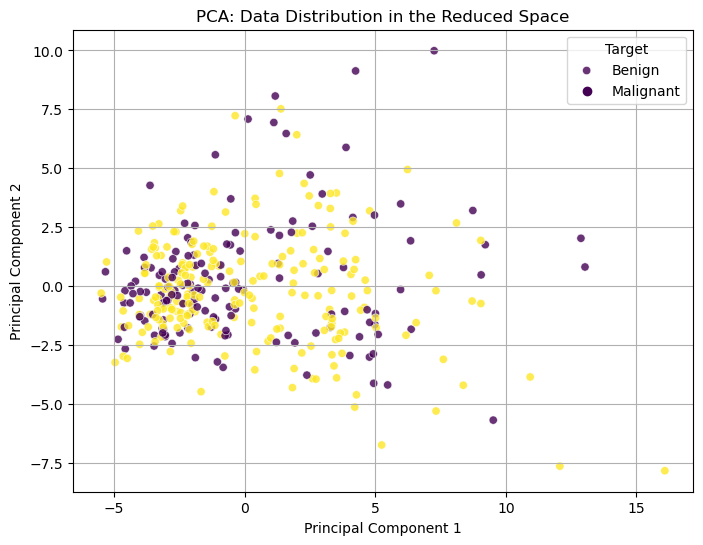

In [21]:
from sklearn.decomposition import PCA

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
n_components = 10  # choose the new dimension
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create DataFrames for PCA results
df_pca_train = pd.DataFrame(data=X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_train['target'] = y_train

df_pca_test = pd.DataFrame(data=X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_test['target'] = y_test

# Print dimensions before and after PCA
print(f"Original Data Dimensions: {X_train_scaled.shape[1]} features")
print(f"Reduced Data Dimensions: {X_train_pca.shape[1]} principal components")

# Visualize the explained variance ratio by each component
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio by Principal Component')
plt.xticks(range(1, n_components+1))
plt.grid()

# Plot the cumulative explained variance ratio
plt.subplot(1, 2, 2)
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Cumulative Explained Variance Ratio')
plt.grid()

plt.tight_layout()
plt.show()

# Visualize the distribution of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca_train, palette='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Data Distribution in the Reduced Space')
plt.legend(title='Target', labels=['Benign', 'Malignant'])
plt.grid()
plt.show()


<a id='Step7.1'></a>
# Step 7.1: Applying All Regression Algorithms to the Original and Dimension- Reduced Dataset with Evaluation Metrics

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Remove rows with missing values in the original dataset
X = X.dropna()
y = y[X.index]  # Match the indices to keep the corresponding target values

# Split the data into training and testing sets for the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
n_components = 10  # You can choose the number of components you want to retain
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Remove rows with missing values in the PCA-reduced datasets
X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index).dropna()
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index).dropna()

y_train_pca = y[X_train_pca.index]  # Match the indices to keep the corresponding target values
y_test_pca = y[X_test_pca.index]  # Match the indices to keep the corresponding target values

# Initialize regression models
linear_reg = LinearRegression()
polynomial_reg = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())])
svr = SVR()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize model names for printing
model_names = ['Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression']

# Function to evaluate the model
def evaluate_model(regressor, X_train, y_train):
    y_pred = cross_val_predict(regressor, X_train, y_train, cv=5)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    return mse, mae, r2

# Evaluate models on the original data
print("\nEvaluation Metrics on Original Data:")
for model, name in zip([linear_reg, polynomial_reg, svr, decision_tree, random_forest], model_names):
    mse, mae, r2 = evaluate_model(model, X_train, y_train)
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")

# Evaluate models on the PCA-reduced data
print("\nEvaluation Metrics on PCA-reduced Data:")
for model, name in zip([linear_reg, polynomial_reg, svr, decision_tree, random_forest], model_names):
    mse, mae, r2 = evaluate_model(model, X_train_pca, y_train_pca)
    print(f"{name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")



Evaluation Metrics on Original Data:
Linear Regression - MSE: 0.07, MAE: 0.20, R-squared: 0.70
Polynomial Regression - MSE: 113.68, MAE: 2.04, R-squared: -485.91
Support Vector Regression - MSE: 0.07, MAE: 0.16, R-squared: 0.70
Decision Tree Regression - MSE: 0.07, MAE: 0.07, R-squared: 0.69
Random Forest Regression - MSE: 0.04, MAE: 0.09, R-squared: 0.83

Evaluation Metrics on PCA-reduced Data:
Linear Regression - MSE: 0.08, MAE: 0.24, R-squared: 0.64
Polynomial Regression - MSE: 2.96, MAE: 0.38, R-squared: -11.66
Support Vector Regression - MSE: 0.06, MAE: 0.15, R-squared: 0.73
Decision Tree Regression - MSE: 0.09, MAE: 0.09, R-squared: 0.62
Random Forest Regression - MSE: 0.05, MAE: 0.10, R-squared: 0.79


<a id='Step7.2'></a>
# Step 7.2: Applying All Classification Algorithms to the Original and Dimension-Reduced Dataset with Evaluation Metrics

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Remove rows with missing values in the original dataset
X = X.dropna()
y = y[X.index]  # Match the indices to keep the corresponding target values

# Split the data into training and testing sets for the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
n_components = 10  # You can choose the number of components you want to retain
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Remove rows with missing values in the PCA-reduced datasets
X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index).dropna()
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index).dropna()

y_train_pca = y[X_train_pca.index]  # Match the indices to keep the corresponding target values
y_test_pca = y[X_test_pca.index]  # Match the indices to keep the corresponding target values

# Initialize classifiers with increased max_iter
logistic_regression = LogisticRegression(max_iter=3000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
gradient_boosting = GradientBoostingClassifier(random_state=42)
neural_network = MLPClassifier(max_iter=2000, random_state=42)

# Initialize model names for printing
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'Neural Network']

# Function to evaluate the model
def evaluate_model(classifier, X_train, y_train):
    y_pred = cross_val_predict(classifier, X_train, y_train, cv=5)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate classifiers on the original data
print("\nEvaluation Metrics on Original Data:")
for model, name in zip([logistic_regression, decision_tree, random_forest, svm, knn, naive_bayes, gradient_boosting, neural_network], model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train, y_train)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")

# Evaluate classifiers on the PCA-reduced data
print("\nEvaluation Metrics on PCA-reduced Data:")
for model, name in zip([logistic_regression, decision_tree, random_forest, svm, knn, naive_bayes, gradient_boosting, neural_network], model_names):
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train_pca, y_train_pca)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")



Evaluation Metrics on Original Data:
Logistic Regression - Accuracy: 0.95, Precision: 0.96, Recall: 0.97, F1-score: 0.96, ROC AUC: 0.95
Decision Tree - Accuracy: 0.92, Precision: 0.94, Recall: 0.93, F1-score: 0.93, ROC AUC: 0.91
Random Forest - Accuracy: 0.96, Precision: 0.96, Recall: 0.98, F1-score: 0.97, ROC AUC: 0.95
SVM - Accuracy: 0.90, Precision: 0.88, Recall: 0.98, F1-score: 0.93, ROC AUC: 0.88
KNN - Accuracy: 0.92, Precision: 0.93, Recall: 0.95, F1-score: 0.94, ROC AUC: 0.91
Naive Bayes - Accuracy: 0.93, Precision: 0.93, Recall: 0.97, F1-score: 0.95, ROC AUC: 0.92
Gradient Boosting - Accuracy: 0.95, Precision: 0.96, Recall: 0.97, F1-score: 0.96, ROC AUC: 0.95
Neural Network - Accuracy: 0.93, Precision: 0.93, Recall: 0.97, F1-score: 0.95, ROC AUC: 0.92

Evaluation Metrics on PCA-reduced Data:
Logistic Regression - Accuracy: 0.95, Precision: 0.96, Recall: 0.97, F1-score: 0.96, ROC AUC: 0.95
Decision Tree - Accuracy: 0.92, Precision: 0.93, Recall: 0.95, F1-score: 0.94, ROC AUC: 0

<a id='Conclusion'></a>
# Result Analysis/ Conclusion

#### Ultimately, the most effective regression algorithm in producing a model was the random forest algorithm as it contained the strongest evaluation metrics whereas the most effective classification aglorithm was the logistic regression as it beat out every other algotrithm in every evaluation metric.

#### In conclusion, employing multiple machine learning methods, this effort revealed valuable insights into breast cancer analysis. I effectively compared and assessed various regression and classification models, determining which were most suited for predicting tumour malignancy. Dimensionality reduction utilizing PCA was also critical in boosting efficiency and comprehending the data's underlying structure.

#### The findings of this project have medical importance since they show the potential of machine learning in supporting medical practitioners in diagnosing and forecasting breast cancer. It lays out the possibilities for future research and practical applications in cancer diagnosis and therapy with machine learning.
.
